# simple example of GMM

## K-Meansの弱点：
### 異方的なデータインプットに対するクラスタリング能力の不自然さ

### GMM:
#### 上の弱点を解決した（？）もの。

### 教師なし学習なので、絶対的な正解がそもそも存在しない

[[ 0.95121488  0.30799331]
 [ 1.50437779  0.4302287 ]
 [ 1.50440859  0.43015884]
 ..., 
 [ 1.60486599  0.65489306]
 [ 1.60508504  0.65489976]
 [ 1.60507529  0.65489362]]


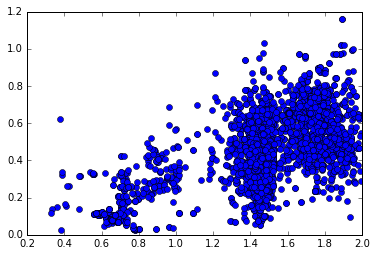

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

"""
1. data preparation
"""
def load_data():
    """
    read data from     Maeda_carbon8_descriptor.csv
    @return : 2D np.array
    """
    df = pd.read_csv("Maeda_carbon8_descriptor.csv",index_col = [0,1])
    """
    use the columns ["aXX1_rpYY1","aXX2_rpYY2"]
    """
    X = df[["a0.25_rp1.5","a0.5_rp2.5"]].as_matrix()
    print(X)
    """
    2D array

    plot raw data
    """
    plt.plot(X[:,0],X[:,1],"o")
    plt.show()
    return X
X = load_data()

In [10]:
"""

3. data analysis


"""
import sklearn.mixture
def analyze_X(X,n_components):
    """
    clustering
    
    @param X: desriptor
    @param n_components : number clusters
    @return y,yproba : y=predicted cluster id, yproba=predicted probability
    """
    
    clf = sklearn.mixture.GaussianMixture(n_components=n_components)
    clf.fit(X)
#    distribution = clf.inertia_
    
    y = clf.predict(X) 
    yproba = clf.predict_proba(X)
    print("y.shape",y.shape)
    print("yproba.shape",yproba.shape)
    return y,yproba

n_components = 4
y,yproba = analyze_X(X,n_components)


y.shape (3560,)
yproba.shape (3560, 4)


In [11]:

import collections
def howmany(y):
    """
    hwo many labels? 
    """
    counter = collections.Counter(y)
    print(counter)
    
howmany(y)

Counter({1: 1529, 3: 1007, 0: 524, 2: 500})


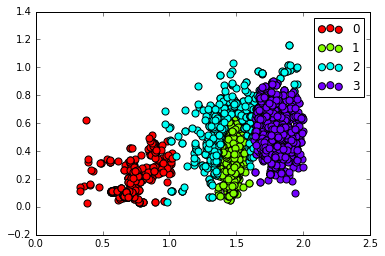

In [18]:
"""
4. visualization
"""
import matplotlib.cm as cm
import numpy as np

def plot_Xy(X,y,n_components):
    """
    cluster id (y)毎にplotする。
    plot them with different colors corresponding to cluster ids
    """
    colors = [cm.hsv(float(i)/float(n_components)) for i in range(n_components+1)]

    for i in range(n_components):
        xx = []
        for x,y1 in zip(X,y):
            if y1 == i:
                xx.append(x)
        xx = np.array(xx)
        plt.scatter(xx[:,0],xx[:,1],color=colors[i],marker="o",label=str(i),
                    edgecolors="black",s=50)
    plt.legend()
    plt.show()
plot_Xy(X,y,n_components)

filename = "output0.25_1.5and0.50_2.5.png"
plt.savefig(filename)


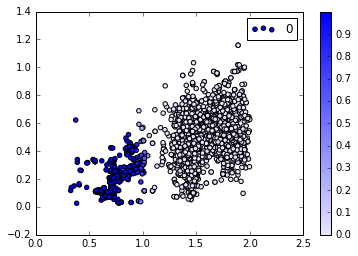

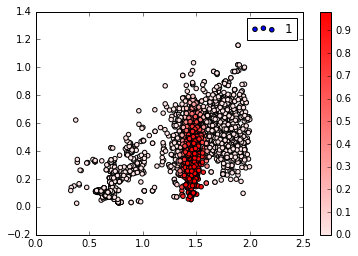

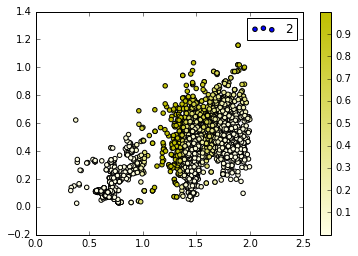

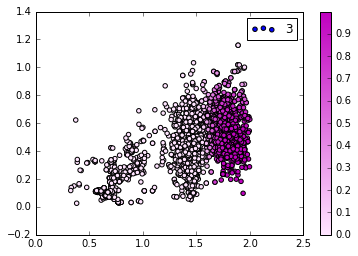

In [32]:
import seaborn as sns
def plot_Xyproba(X,yproba,n_components):
    """
    plot cluster probability (yproba)
    
    show     probability as colormap
    
    @param X: descriptor
    @param yproba: probability
    @param n_components : number of clusters

    """
    colors = ["b","r","y","m","c"]

    for i in range(n_components):
        f, ax = plt.subplots()
        cmap = sns.light_palette(colors[i],as_cmap=True)
        points = plt.scatter(X[:,0],X[:,1],c=yproba[:,i],cmap=cmap,label=str(i))
        f.colorbar(points)
        plt.legend()
        plt.show()
        filename = "Xyploba_{0:02d}_0.25_1.5and0.50_2.5.png".format(i)
        plt.savefig(filename)

plot_Xyproba(X,yproba,n_components)

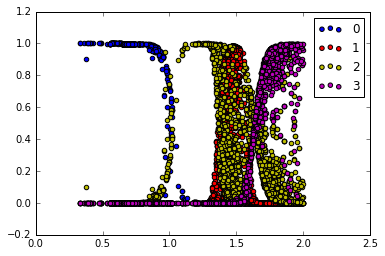

In [33]:
import seaborn as sns
def plot_X1yproba(X1,yproba,n_components):
    """
    plot cluster probability (yproba) along X1
    
    @param X: descriptor
    @param yproba: probability
    @param n_components : number of clusters

    """
    colors = ["b","r","y","m","c"]

    for i in range(n_components):
        plt.scatter(X1,yproba[:,i],c=colors[i],label=str(i))
    plt.legend()
    plt.show()
        
plot_X1yproba(X[:,0],yproba,n_components)

## エルボー法


In [35]:
distributions = []

for n in range(1,5):
    y,yproba,clf = analyze_X(X,n)
    distributions.append(clf.inertia_)

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

y.shape (3560,)
yproba.shape (3560, 1)


AttributeError: 'GaussianMixture' object has no attribute 'inertia_'